In [ ]:
#--------------------------------------DATA PREPERATION---------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [5]:
print(df.head())
print(df.info())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float

In [7]:
df.iloc[0, 0] = np.nan


In [9]:
X = df.drop("target", axis=1)
y = df["target"]

In [11]:
numeric_features = X.columns.tolist()

In [19]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),        
    ("scaler", StandardScaler())                       
])

In [21]:
numeric_transformer 

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ]
)

In [17]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['sepal length (cm)', 'sepal width (cm)',
                                  'petal length (cm)', 'petal width (cm)'])])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#--------------------------MODEL BUILDING-----------------------------------------------------------------------------

In [27]:
model = RandomForestClassifier(random_state=42)

In [29]:
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", model)
])

In [31]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['sepal length (cm)',
                                                   'sepal width (cm)',
                                                   'petal length (cm)',
                                                   'petal width (cm)'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [33]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['sepal length (cm)',
                                                   'sepal width (cm)',
                                                   'petal length (cm)',
                                                   'petal width (cm)'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [35]:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [3, 5, None]
}

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'classifier__max_depth': 3, 'classifier__n_estimators': 50}


In [37]:
param_grid

{'classifier__n_estimators': [50, 100], 'classifier__max_depth': [3, 5, None]}

In [39]:
#----------------------------------------EVALUTION-------------------------------------------------------------

In [41]:
y_pred = grid_search.predict(X_test)

In [43]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [45]:
if len(np.unique(y)) == 2:
    y_prob = grid_search.predict_proba(X_test)[:, 1]
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

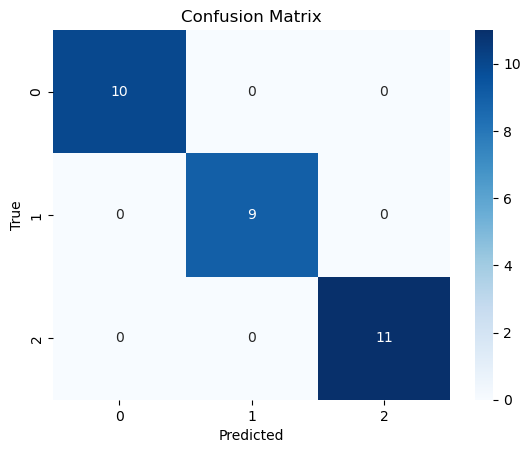

In [47]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [49]:
#---------------------------------------PIPELINE INTEGRATION--------------------------------------------------------------

In [51]:
final_model = grid_search.best_estimator_

In [53]:
final_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['sepal length (cm)',
                                                   'sepal width (cm)',
                                                   'petal length (cm)',
                                                   'petal width (cm)'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=3, n_estimators=50,
                                        random_state=42))])